In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf

# DADOS

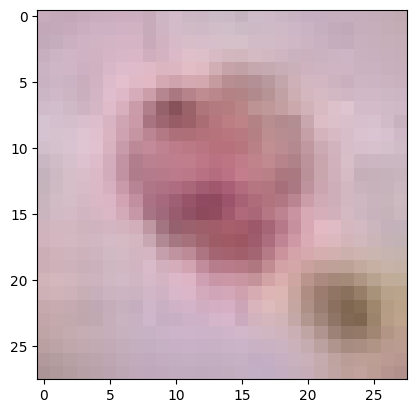

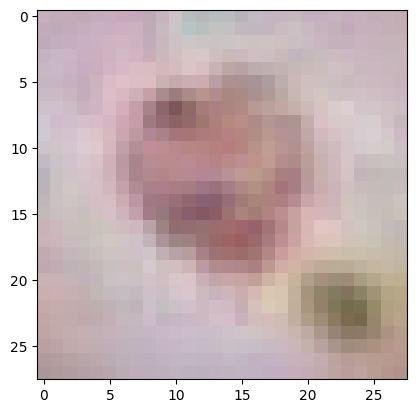

In [39]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
yt = to_categorical(yt,2)

scalerx = MinMaxScaler().fit(xt)
xScaled = scalerx.transform(xt)
# scalerx = StandardScaler().fit(xt)
# xScaled = scalerx.transform(xt)
# oi = (xt).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()
# oi = (xScaled).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.1, shuffle=True, random_state=10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=10)
counterx=0
countery=0
increment = 4
add = []
for idx, i in enumerate(y_train):
        if i[1] == 1:
            counterx += increment
            for k in range(0, increment-1):
                y_train = np.vstack((y_train, i))
                add = np.append(add, X_train[idx, :])
        else: 
             countery += 1
X_train = np.append(X_train, add)
print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)

0.386002886002886 0.613997113997114 2140 3404


# Apenas para ver as imagens

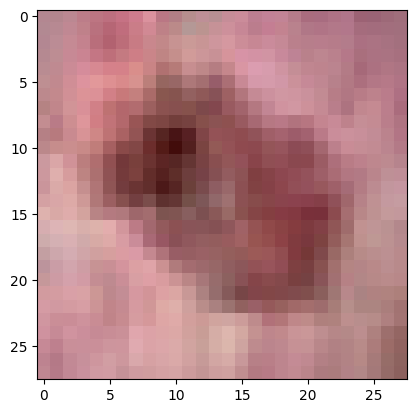

[[0. 1.]]


In [4]:
oi = X_train.reshape(-1,28,28,3)
for i in oi[-1:]:
    plt.imshow(i)
    plt.show()
print(y_train[-1:])

# Código da Neural Network

In [108]:
MLP = Sequential()
MLP.add(Convolution2D(8, (3,3), input_shape=(28,28,3), activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2,2), strides=2))
MLP.add(Convolution2D(16, (5,5), activation='relu',padding='same'))
MLP.add(MaxPooling2D(pool_size=(2,2), strides=2))
MLP.add(Flatten())
MLP.add(Dense(120, activation='relu'))
MLP.add(Dense(84, activation='relu'))
MLP.add(Dense(2, activation='softmax'))
X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
X_validationrs = X_validation.reshape(-1, 28,28,3)

In [109]:
# MLP = Sequential()
# MLP.add(Dense(64,input_dim=28*28*3, activation='relu'))
# MLP.add(Dense(32, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))
#X_trainrs = X_train.reshape(-1, 28*28*3)

In [110]:
MLP.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 8)         224       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 120)             

In [111]:
# learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.0001,
#     decay_steps=10000,
#     decay_rate=0.96
# )
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=4,
    min_lr=0.0001
)
MLP.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

In [112]:
Early_callback = EarlyStopping(monitor='val_loss', patience=9, mode='min', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_trainrs, y=y_train, epochs=50, validation_data=(X_validationrs, y_validation), verbose=2, batch_size=128, callbacks=[lr_callback, Early_callback])

Epoch 1/50
44/44 - 3s - loss: 0.6282 - accuracy: 0.6122 - mse: 0.2204 - val_loss: 0.4036 - val_accuracy: 0.8040 - val_mse: 0.1310 - lr: 0.0010 - 3s/epoch - 74ms/step
Epoch 2/50
44/44 - 2s - loss: 0.5330 - accuracy: 0.6829 - mse: 0.1842 - val_loss: 0.4013 - val_accuracy: 0.7880 - val_mse: 0.1361 - lr: 0.0010 - 2s/epoch - 42ms/step
Epoch 3/50
44/44 - 2s - loss: 0.4854 - accuracy: 0.7296 - mse: 0.1661 - val_loss: 0.3804 - val_accuracy: 0.7910 - val_mse: 0.1306 - lr: 0.0010 - 2s/epoch - 47ms/step
Epoch 4/50
44/44 - 2s - loss: 0.4488 - accuracy: 0.7572 - mse: 0.1530 - val_loss: 0.3778 - val_accuracy: 0.7934 - val_mse: 0.1291 - lr: 0.0010 - 2s/epoch - 43ms/step
Epoch 5/50
44/44 - 2s - loss: 0.4272 - accuracy: 0.7756 - mse: 0.1445 - val_loss: 0.3467 - val_accuracy: 0.8153 - val_mse: 0.1184 - lr: 0.0010 - 2s/epoch - 41ms/step
Epoch 6/50
44/44 - 2s - loss: 0.4245 - accuracy: 0.7778 - mse: 0.1439 - val_loss: 0.3498 - val_accuracy: 0.8099 - val_mse: 0.1204 - lr: 0.0010 - 2s/epoch - 50ms/step
Epoc

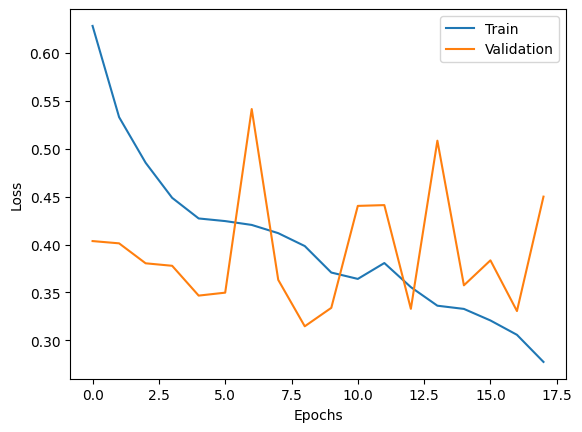

In [123]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

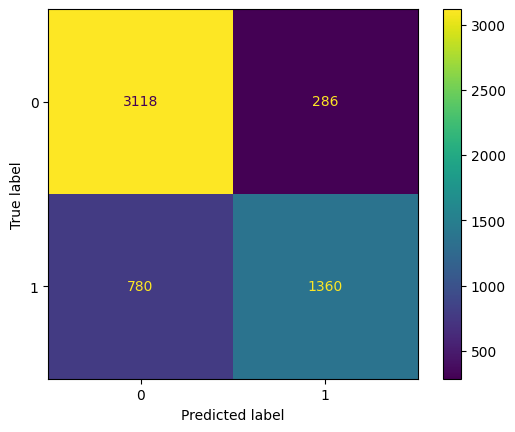

F1 -> 0.7184363444268357


In [124]:
from sklearn.metrics import f1_score
y_predtrain = MLP.predict(X_trainrs, verbose=0)
y_predtrain = np.argmax(y_predtrain, axis=1)
cm2 = confusion_matrix(np.argmax(y_train, axis=1), y_predtrain)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
disp2.plot()
plt.show()
print("F1 ->", f1_score(np.argmax(y_train, axis=1), y_predtrain))

In [125]:

y_pred = MLP.predict(X_testrs, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
MLP.evaluate(X_testrs, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("F1 ->", f1_score(y_comp, y_pred))

20/20 [==============================] - 0s 5ms/step - loss: 0.3375 - accuracy: 0.8323 - mse: 0.1126
F1 -> 0.5414847161572052


In [126]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

105

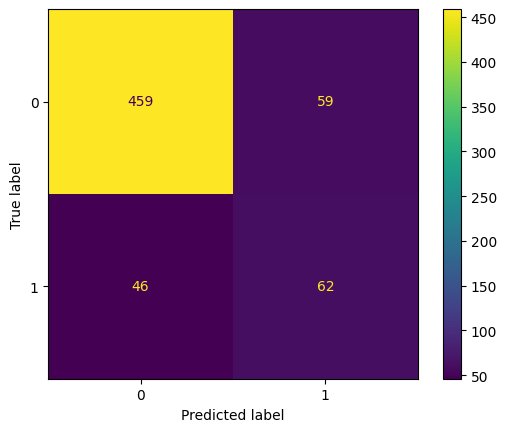

In [127]:
cm = confusion_matrix(y_comp, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()
